In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)

In [2]:
#importing 
df = pd.read_csv("Features.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Exploration
print("Shape",df.shape,"\n",df.dtypes)
# 205 rows , 26 columns , correct data types

Shape (205, 26) 
 car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<h1>Cleaning<h1>

In [5]:
#Dropping car ID
df = df.drop('car_ID',axis=1)

In [6]:
#Percentages of missing values
df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False)
# No Missing values in this dataset

price               0.0
carheight           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
curbweight          0.0
highwaympg          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
symboling           0.0
dtype: float64

Text(0.5, 0, 'Continuous Variable')

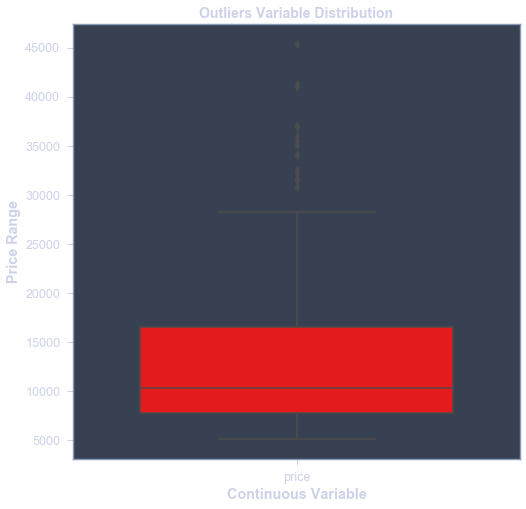

In [7]:
# To Analayze the outliers in the price values we need to visualize them
# Using boxplot to spot outliers

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

# Analysis: it appears that the outliers starts after 37000$ until 45000$
# These outliers might be removed or scaled using standardized scaling

In [8]:
# Spliting the make and model columns
df_split = df['CarName'].str.split(' ',1,expand=True)
df['Make'] = df_split[0]
df['Model'] = df_split[1]
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make,Model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [9]:
# Repostioning
df = df[['symboling', 'Model','Make', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'
       ]]
df.head()

,symboling,Model,Make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# What makers we have
df['Make'].unique()

#Analysis : some makers have wrong names and duplicated error names

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
# To standardize the make names
# Replace wrong names whith the correct ones
df['Make'] = df['Make'].replace({'maxda': 'mazda', 'nissan': 'Nissan',
                                 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [12]:
# Checking duplicates 
df.loc[df.duplicated()]
# no duplicates in this dataset

,symboling,Model,Make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [13]:
# In order to make better visuals then standardize the categorical values
# Seperate the dataframes of numerical and categorical features
df['symboling'] = df['symboling'].astype(str)
obj_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns
df_categ = df[obj_cols]
df_num = df[num_cols]

In [14]:
df_categ.head()

,symboling,Model,Make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,giulia,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,stelvio,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,100 ls,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,100ls,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [15]:
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<h1>Analysis & Correlations<h1>

Text(0, 0.5, 'Count of Cars')

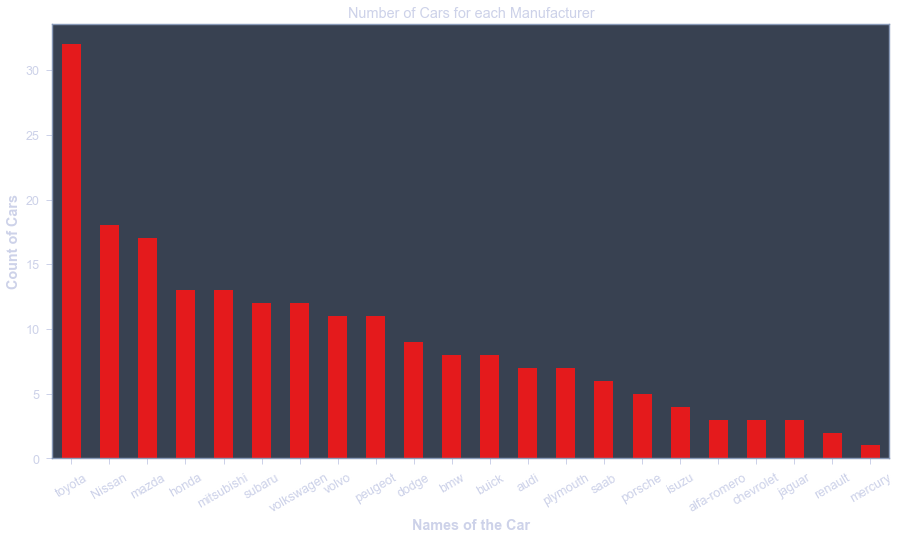

In [16]:
# Visualize the number of cars for each manufacturer

plt.rcParams['figure.figsize'] = [15,8]
ax=df['Make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
plt.xticks(rotation=30)
ax.title.set_text('Number of Cars for each Manufacturer')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

# Insight : top 3 manufacturers are : Toyota,Nissan and Mazda / Mercury has least nb of cars

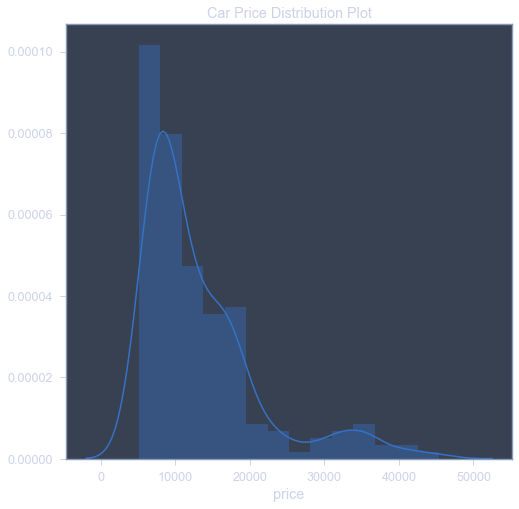

In [17]:
# Visualize the distribution of cars price
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

# Insight : Most of the cars have a price less than or equal to 19000$

<Figure size 2160x2160 with 0 Axes>

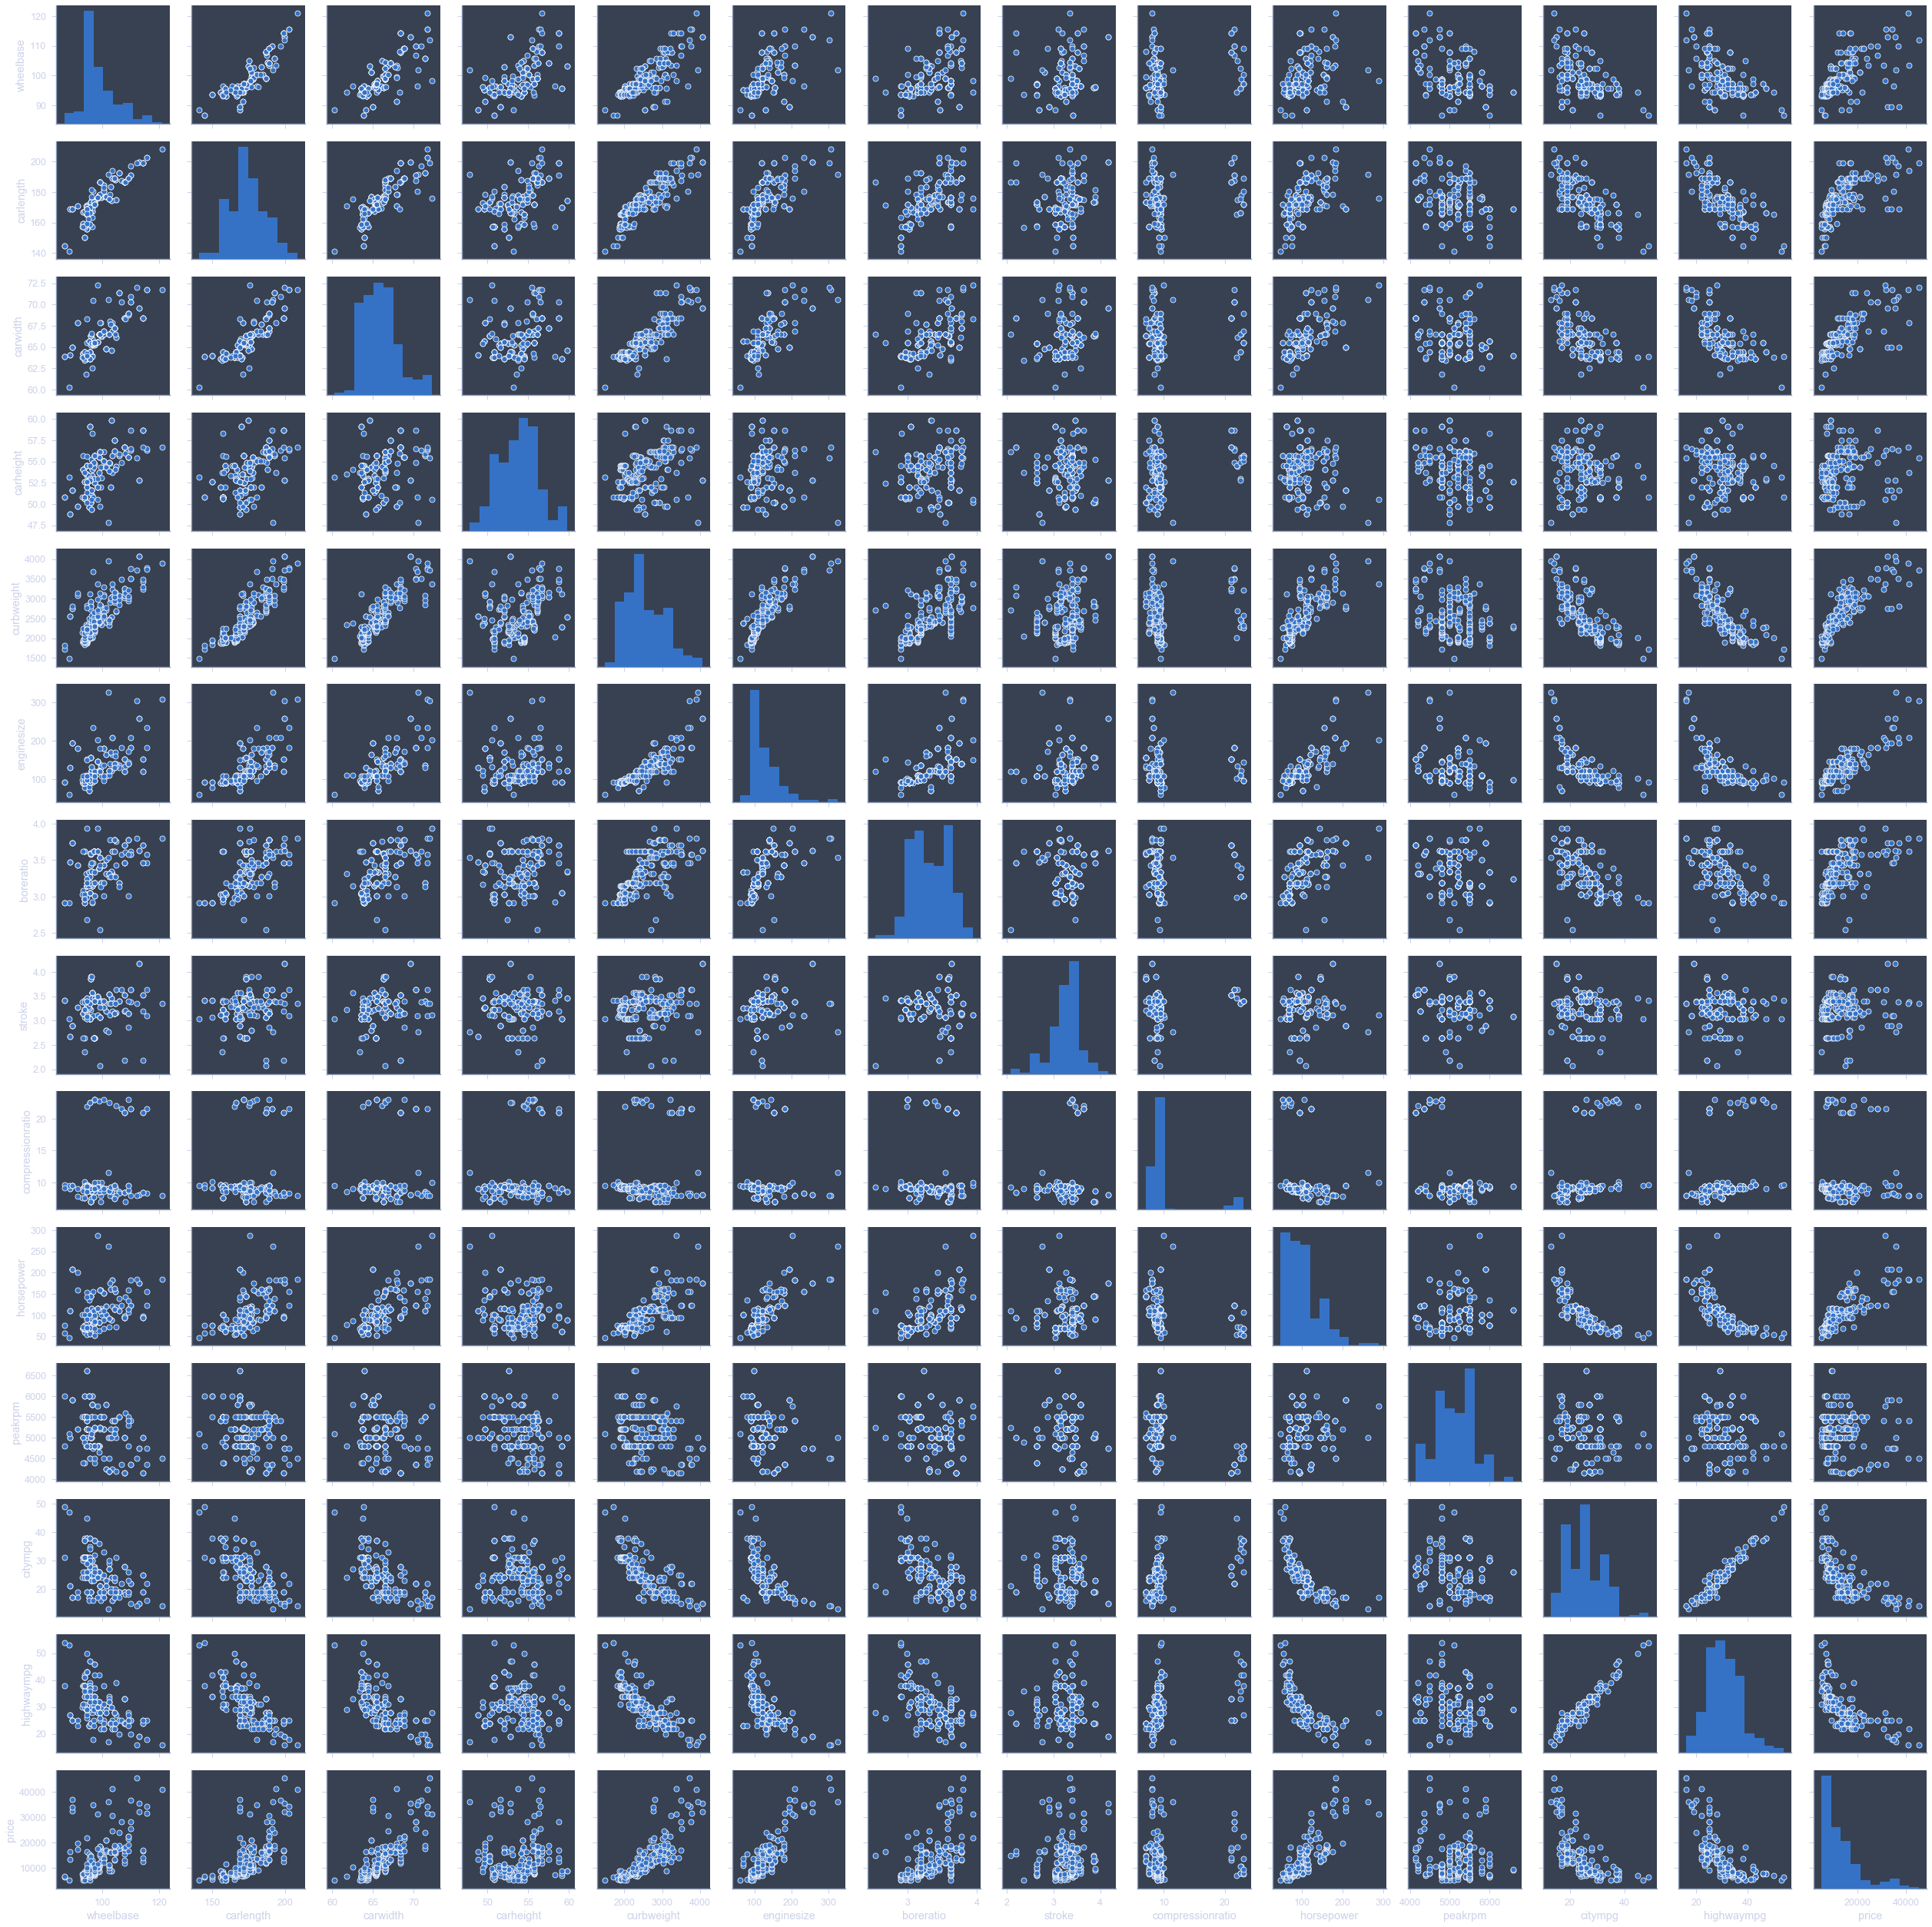

In [18]:
# Visualizing the Scatter plots to analyze correlations with the price
plt.figure(figsize=(30,30))
ax = sns.pairplot(df[num_cols])

# Analysis : Looking the bottom row of scatter plots ( each feature with the price)
# carwidth , carlength, curbweight ,enginesize ,horsepower have positive correlation with the price
# Citympg , Highwatmpg have negative correlation with the price
# Car-height , Compressor ration and Peakrpm doesn't have a good correlation with the price

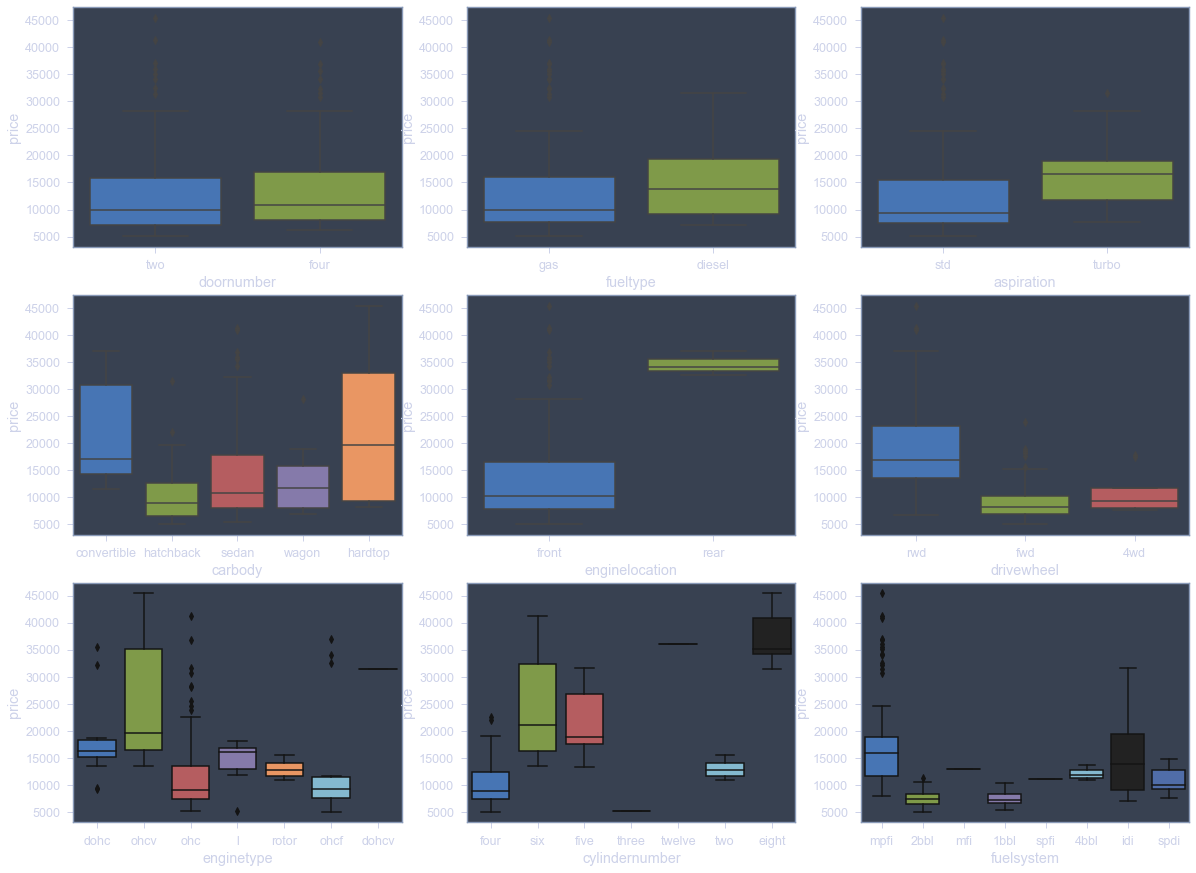

In [19]:
# Now we have visualized the numerical values and their correlations
# Visualize the categorical variables with the price
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

### Analysis : 
# Fueltype : Gas makes cars cheaper than cars with diesel
# Carbody : the convertible type is more expensive than other carbodies
# Engine Location : Rear location is way too expensive than cars with front engine
# Cyliner Number : most of cylinder numbers are proportional to the price (high clylinder ==> more expensive)
# Engine Type : OHCV is the most type in expenive cars
# Doornumber : has no strong impact on price
# Drive wheel : 'RWD' is mostly in expensive cars

[Text(0, 0.5, 'Frequency of Number of cylinders'),
 Text(0.5, 0, 'Number of cylinders')]

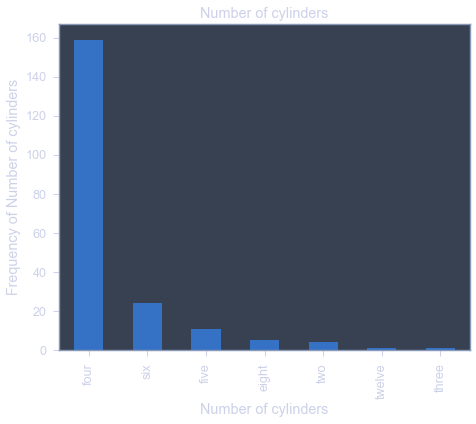

In [20]:
# Visualize the cylinder number distribution
plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot('bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

# Inight : most of cars have 4 cylinders

[Text(0, 0.5, 'Frequency of Fuel type'), Text(0.5, 0, 'Fuel Type')]

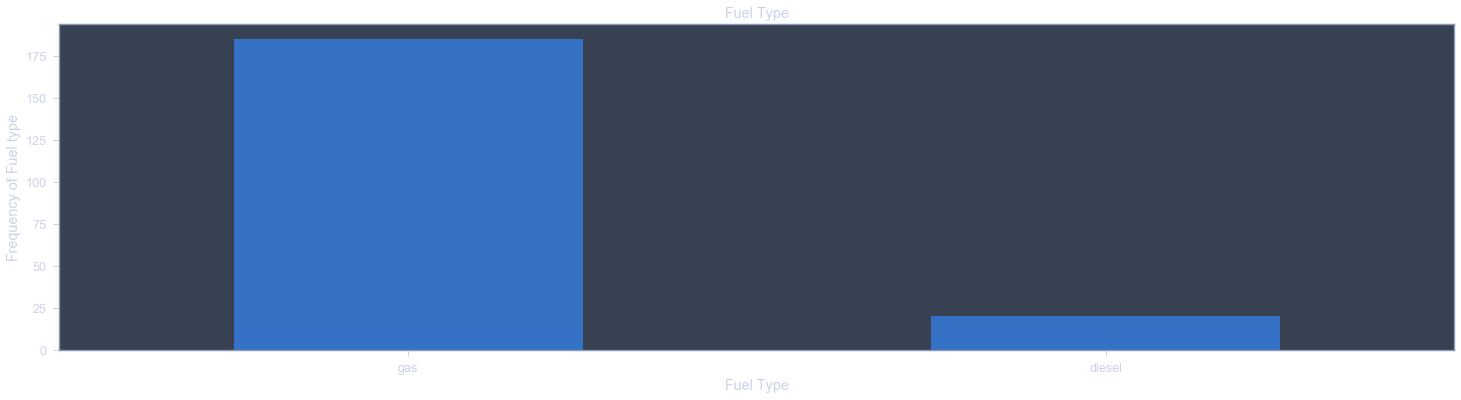

In [21]:
# Visualize the fuel type frequency
plt.figure(figsize=(25, 6))
plt1 = df['fueltype'].value_counts().plot('bar')
plt.xticks(rotation=0)
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

# Most of the cars have gas fuel type

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

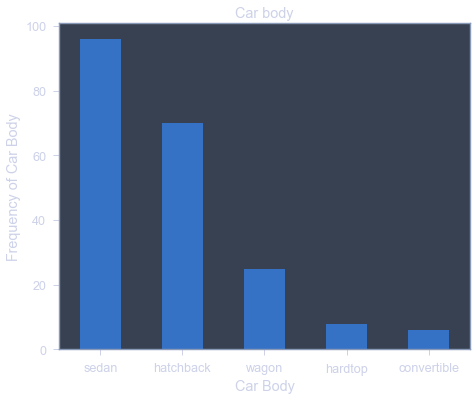

In [22]:
# Visualize the car body frequency
plt.figure(figsize=(25, 6))
plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot('bar')
plt.xticks(rotation=0)
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

# sedan and hatchbakc are mostly common car bodies

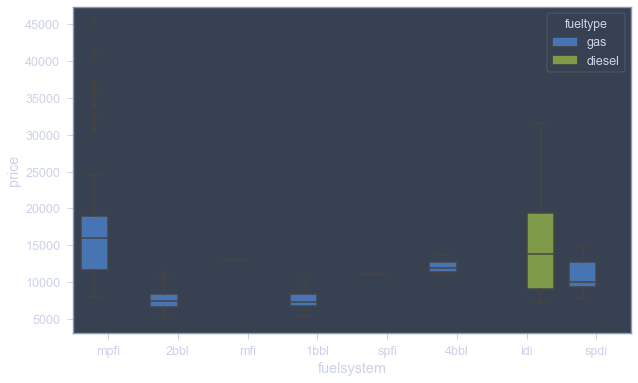

In [23]:
# Visualize the relationship between fuelsystem, fueltype and price
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

# Insight : mpfi gas type and idi diesel type are has higher price

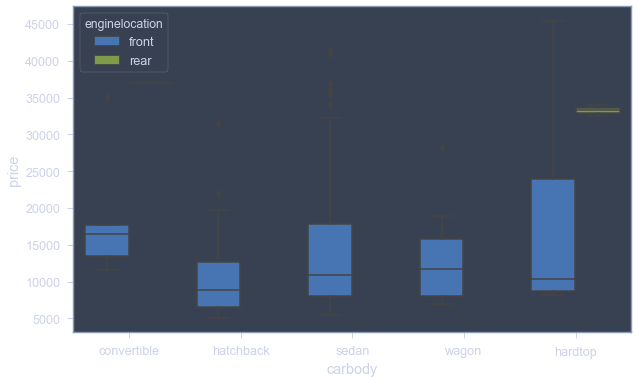

In [24]:
# Visualize relationship between carbody, enginelocation and price
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

# Inight : hardtop carbodies in both enginelocations results in higher prices

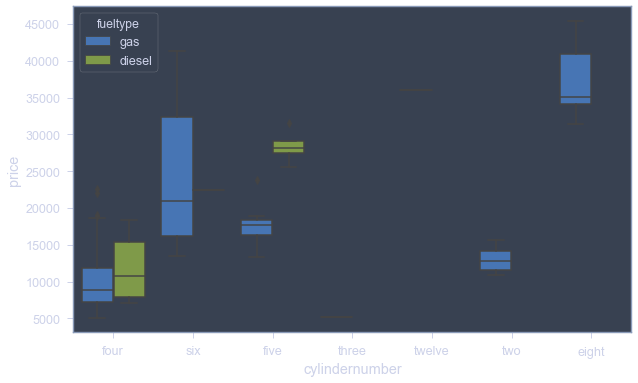

In [25]:
# visualize the fueltype, cylindernuber and price
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

# Insight: six and eight cylinders with gas fueltype are the most expensive

<Figure size 1440x432 with 0 Axes>

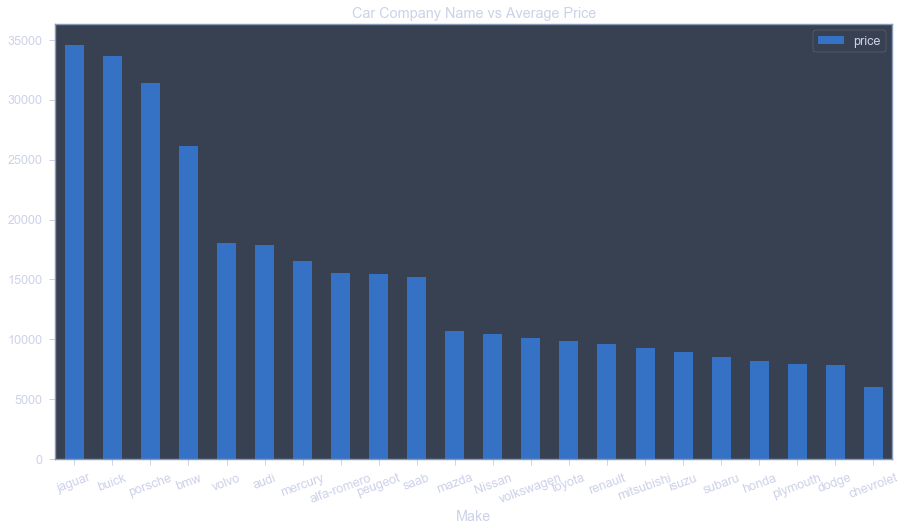

In [26]:
# Now to visualize the distribution of average price with each car make
plt.figure(figsize=(20, 6))
df_autox = pd.DataFrame(df.groupby(['Make'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.xticks(rotation=20)
plt.title('Car Company Name vs Average Price')
plt.show()

# Insight : Jaguar, buick, porsche, BMW have the highest average price

<Figure size 1440x432 with 0 Axes>

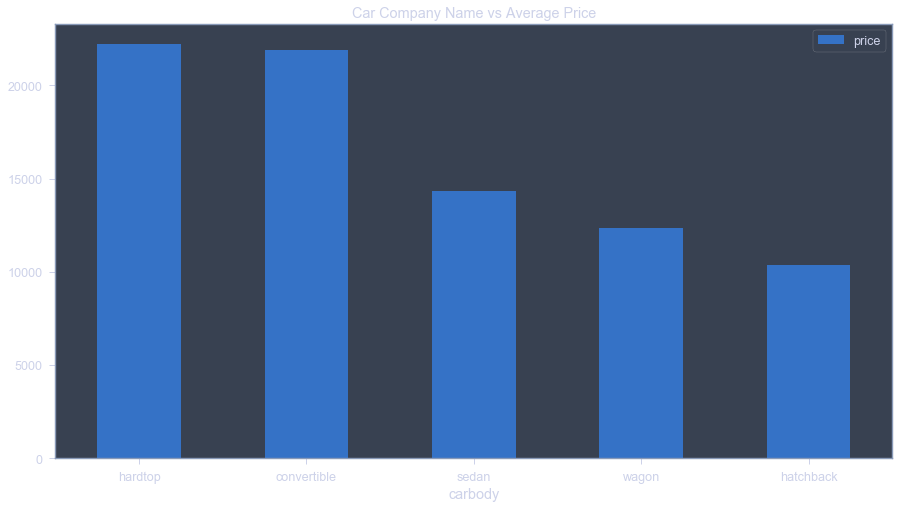

In [27]:
# Visualize the average price for each carbody
plt.figure(figsize=(20, 6))
df_autoy = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.xticks(rotation=0)
plt.title('Car Company Name vs Average Price')
plt.show()

# Insight : Hardtop, Convertible have the highest average price

In [28]:
# in order to make better predictions on price 
# we will use price range classification to make categories 
# between 0-$10000 : low_range   10000-$20000 : medium range    $20000-$40000 High_Range
# using bins and grouping the cars by make with the mean of their cars price

df['price'] = df['price'].astype('int')
df_temp = df.copy()
t = df_temp.groupby(['Make'])['price'].mean()
t

Make
Nissan         10415.666667
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [29]:
#binning and categorizing 
# Column named Cars Category
df_temp = df_temp.merge(t.reset_index(), how='left',on='Make')
bins = [0,10000,20000,40000]
label =['Low_Range','Medium_Range','High_Range']
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

,symboling,Model,Make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


In [33]:
# Finally after visualization and Analysis 
# We choose the best variables for price predicion

best_features = ['price','Cars_Category','enginetype','fueltype',
                 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
features = ['Model','Make','price','Cars_Category','enginetype','fueltype',
                 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
df_best_features = df[best_features]
df_features = df[features]
df_best_features.to_csv("Cleaned_Features.csv")
df_features.to_csv("Cleaned_fearures_withNames.csv")